<a href="https://colab.research.google.com/github/mlcafe/Pengenalan-ML/blob/master/5_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sys
assert sys.version_info >= (3, 5)
import sklearn
assert sklearn.__version__ >= "0.20"
import numpy as np
import os
from sklearn import metrics

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt


**Random Forest Classifier **
Load Dataset Digit

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

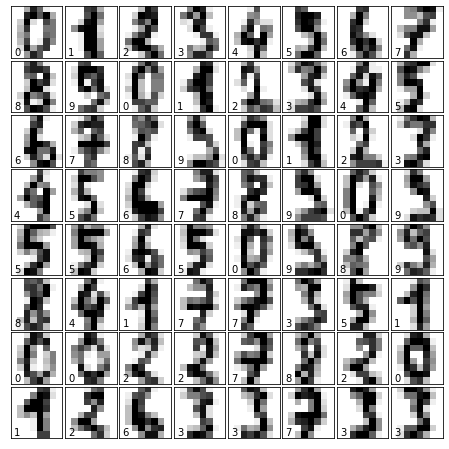

In [ ]:
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

Classify digits with Random Forest

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target,
                                                random_state=0)
model = RandomForestClassifier(n_estimators=100, max_depth = 5)
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)

Evaluation metrics


In [ ]:
from sklearn import metrics
print(metrics.classification_report(ypred, ytest))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        38
           1       0.98      0.91      0.94        46
           2       0.89      1.00      0.94        39
           3       0.91      0.84      0.87        49
           4       0.95      0.97      0.96        37
           5       0.96      0.90      0.93        51
           6       1.00      1.00      1.00        52
           7       0.98      0.90      0.94        52
           8       0.83      0.95      0.89        42
           9       0.87      0.93      0.90        44

    accuracy                           0.94       450
   macro avg       0.94      0.94      0.94       450
weighted avg       0.94      0.94      0.94       450



**Random Forest Regressor**
Predict house price

In [ ]:
from sklearn import datasets
import pandas as pd

boston = datasets.load_boston()

features = pd.DataFrame(boston.data, columns=boston.feature_names)
targets = boston.target

In [ ]:
print(features[:5]) 
print(targets[:5])
print('Number of features',np.shape(features))

      CRIM    ZN  INDUS  CHAS    NOX  ...  RAD    TAX  PTRATIO       B  LSTAT
0  0.00632  18.0   2.31   0.0  0.538  ...  1.0  296.0     15.3  396.90   4.98
1  0.02731   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  396.90   9.14
2  0.02729   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  392.83   4.03
3  0.03237   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  394.63   2.94
4  0.06905   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  396.90   5.33

[5 rows x 13 columns]
[24.  21.6 34.7 33.4 36.2]
Number of features (506, 13)


Train with Random Forest Regressor

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, targets, train_size=0.8, random_state=42)
scaler = StandardScaler().fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index.values, columns=X_train.columns.values)
X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index.values, columns=X_test.columns.values)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=500, oob_score=True, random_state=0)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=True,
                      random_state=0, verbose=0, warm_start=False)

Evaluation metrics

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

predicted_test = rf.predict(X_test)

r2 = r2_score(y_test, predicted_test)
mse = mean_squared_error(y_test, predicted_test)

print('R2 score:', r2)
print('MSE :', mse)


R2 score: 0.8847356180108363
MSE : 8.452773194901964


Feature importance

Feature: 0, Score: 0.03617
Feature: 1, Score: 0.00175
Feature: 2, Score: 0.00673
Feature: 3, Score: 0.00112
Feature: 4, Score: 0.01864
Feature: 5, Score: 0.48270
Feature: 6, Score: 0.01474
Feature: 7, Score: 0.05753
Feature: 8, Score: 0.00449
Feature: 9, Score: 0.01623
Feature: 10, Score: 0.01655
Feature: 11, Score: 0.01371
Feature: 12, Score: 0.32964


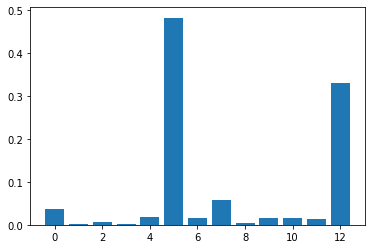

In [ ]:
# get importance
importance = rf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()